# CS381/780 Data Analytics Final Project

### Due on 12/13/2021 23:59 pm

In [1]:
import numpy as np
import pandas as pd
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

In [3]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

### Dataset is based on the follwoing 

https://archive.ics.uci.edu/ml/datasets/statlog+(german+credit+data)

Attribute Information:

Attribute 1: (qualitative)
Status of existing checking account
A11 : ... < 0 DM
A12 : 0 <= ... < 200 DM
A13 : ... >= 200 DM / salary assignments for at least 1 year
A14 : no checking account

Attribute 2: (numerical)
Duration in month

Attribute 3: (qualitative)
Credit history
A30 : no credits taken/ all credits paid back duly
A31 : all credits at this bank paid back duly
A32 : existing credits paid back duly till now
A33 : delay in paying off in the past
A34 : critical account/ other credits existing (not at this bank)

Attribute 4: (qualitative)
Purpose
A40 : car (new)
A41 : car (used)
A42 : furniture/equipment
A43 : radio/television
A44 : domestic appliances
A45 : repairs
A46 : education
A47 : (vacation - does not exist?)
A48 : retraining
A49 : business
A410 : others

Attribute 5: (numerical)
Credit amount

Attibute 6: (qualitative)
Savings account/bonds
A61 : ... < 100 DM
A62 : 100 <= ... < 500 DM
A63 : 500 <= ... < 1000 DM
A64 : .. >= 1000 DM
A65 : unknown/ no savings account

Attribute 7: (qualitative)
Present employment since
A71 : unemployed
A72 : ... < 1 year
A73 : 1 <= ... < 4 years
A74 : 4 <= ... < 7 years
A75 : .. >= 7 years

Attribute 8: (numerical)
Installment rate in percentage of disposable income

Attribute 9: (qualitative)
Personal status and sex
A91 : male : divorced/separated
A92 : female : divorced/separated/married
A93 : male : single
A94 : male : married/widowed
A95 : female : single

Attribute 10: (qualitative)
Other debtors / guarantors
A101 : none
A102 : co-applicant
A103 : guarantor

Attribute 11: (numerical)
Present residence since

Attribute 12: (qualitative)
Property
A121 : real estate
A122 : if not A121 : building society savings agreement/ life insurance
A123 : if not A121/A122 : car or other, not in attribute 6
A124 : unknown / no property

Attribute 13: (numerical)
Age in years

Attribute 14: (qualitative)
Other installment plans
A141 : bank
A142 : stores
A143 : none

Attribute 15: (qualitative)
Housing
A151 : rent
A152 : own
A153 : for free

Attribute 16: (numerical)
Number of existing credits at this bank

Attribute 17: (qualitative)
Job
A171 : unemployed/ unskilled - non-resident
A172 : unskilled - resident
A173 : skilled employee / official
A174 : management/ self-employed/
highly qualified employee/ officer

Attribute 18: (numerical)
Number of people being liable to provide maintenance for

Attribute 19: (qualitative)
Telephone
A191 : none
A192 : yes, registered under the customers name

Attribute 20: (qualitative)
foreign worker
A201 : yes
A202 : no

### Your task in the final project is build the best predictive model to classify if a loan will carry good or bad credit risks. The focus should be in identifying bad risk loans

* Try at least two of the models (Logistic, SVM, Naive Bayes, Decision Tree and Random Forecast) that we have covered in class.
* Do not use any models that we have not covered in class.

* Answer the question whether past credit history will be an important factor or not.

### Make sure your work include the following steps

* EDA (chekcing missing values, removing outliers)
* performed basic exploration of relationship, with plots and graphs
* separated data set into training and testing
* setup dummy variables to take care categorical variables
* normalize numerical features if needed
* tried at least two models and checked their model performance
* performed cross-validations

In [4]:
df = pd.read_csv("german_credit_modified.csv")
df.head()

,Checking Account,Duration,Credit History,Purpose,Credit Amount,Saving Account,Employment Status,Installment Rate,Personal Status,Guarantors,Years in current address,Property,Age,Installment plans,Housing,Existing Credits,Job,Liable,Risk
0,A11,6,A34,A43,1169,A65,A75,4,A93,A101,4,A121,67,A143,A152,2,A173,1,1
1,A12,48,A32,A43,5951,A61,A73,2,A92,A101,2,A121,22,A143,A152,1,A173,1,2
2,A14,12,A34,A46,2096,A61,A74,2,A93,A101,3,A121,49,A143,A152,1,A172,2,1
3,A11,42,A32,A42,7882,A61,A74,2,A93,A103,4,A122,45,A143,A153,1,A173,2,1
4,A11,24,A33,A40,4870,A61,A73,3,A93,A101,4,A124,53,A143,A153,2,A173,2,2


In [5]:
df['Risk'] = df['Risk'].apply(lambda x: 'good' if x == 1 else 'bad')

In [6]:
df.head()

,Checking Account,Duration,Credit History,Purpose,Credit Amount,Saving Account,Employment Status,Installment Rate,Personal Status,Guarantors,Years in current address,Property,Age,Installment plans,Housing,Existing Credits,Job,Liable,Risk
0,A11,6,A34,A43,1169,A65,A75,4,A93,A101,4,A121,67,A143,A152,2,A173,1,good
1,A12,48,A32,A43,5951,A61,A73,2,A92,A101,2,A121,22,A143,A152,1,A173,1,bad
2,A14,12,A34,A46,2096,A61,A74,2,A93,A101,3,A121,49,A143,A152,1,A172,2,good
3,A11,42,A32,A42,7882,A61,A74,2,A93,A103,4,A122,45,A143,A153,1,A173,2,good
4,A11,24,A33,A40,4870,A61,A73,3,A93,A101,4,A124,53,A143,A153,2,A173,2,bad


<AxesSubplot:xlabel='Risk', ylabel='count'>

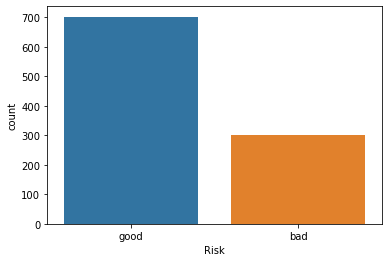

In [7]:
sns.countplot(df['Risk'])

***The original dataset is hard to understand. So we are going to decode the fields to an easier to understand format***

In [8]:
decode_map = {'A11': 'little', 'A12': 'moderate', 'A13': 'rich', 'A14': 'No Account',
              'A30': 'paid back', 'A31': 'paid back', 'A32': 'paid back', 
              'A33': 'delay', 'A34': 'default',
              'A40' : 'car',
              'A41' : 'car',
              'A42' : 'furniture/equipment',
              'A43' : 'radio/television',
              'A44' : 'domestic appliances',
              'A45' : 'repairs',
              'A46' : 'education',
              'A47' : 'vacation',
              'A48' : 'retraining',
              'A49' : 'business',
              'A410' : 'others',
              'A61' :  'little',
              'A62' :  'moderate',
              'A63' :  'quite rich',
              'A64' :  'rich',
              'A65' :  'unknown',
              
              'A71' : 'unemployed',
              'A72' : '< 1 year',
              'A73' : '1 to <4 years',
              'A74': '4 to <7 years',
              'A75' : '>= 7 years',

              'A91' : 'male   : divorced/separated',
              'A92' : 'female : divorced/separated/married',
              'A93' : 'male   : single',
              'A94' : 'male   : married/widowed',
              'A95' : 'female : single',
              
              'A101' : 'none',
              'A102' : 'co-applicant',
              'A103' : 'guarantor',

              'A121' : 'real estate',
              'A122' : 'life insurance',
              'A123' : 'car',
              'A124' : 'no property',
              
              'A141' : 'bank',
              'A142' : 'stores',
              'A143' : 'none',
              'A151' : 'rent',
              'A152' : 'own',
              'A153' : 'for free',


              'A171' : 'unemployed/non-resident',
              'A172' : 'unskilled/resident',
              'A173' : 'skilled employee',
              'A174' : 'management/highly qualified employee',
            
             }

In [9]:
for col in df.columns:
    df[col] = df[col].apply(lambda x: decode_map[x] if x in decode_map.keys() else x)

df.head()

In [10]:
df.shape

(1003, 19)

***Now you can start from this dataset***

### Good Luck !!!

### Your task in the final project is build the best predictive model to classify if a loan will carry good or bad credit risks. The focus should be in identifying bad risk loans

Show all your work below

* Try at least two of the models (Logistic, SVM, Naive Bayes, Decision Tree and Random Forecast) that we have covered in class.
* Do not use any models that we have not covered in class.

* Answer the question whether past credit history will be an important factor or not.

### Make sure your work include the following steps

* EDA (chekcing missing values, removing outliers)
* performed basic exploration of relationship, with plots and graphs
* separated data set into training and testing
* setup dummy variables to take care categorical variables
* normalize numerical features if needed
* tried at least two models and checked their model performance
* performed cross-validations

### EDA 

### 2 Unique Models that include Credit History and that do not include Credit History 

#### Information Pertinent to the Qualitative Variable labelled 'Credit History' in our DataSet

* Attribute 3: (qualitative) Credit history A30 : no credits taken/ all credits paid back duly A31 : all credits at this bank paid back duly A32 : existing credits paid back duly till now A33 : delay in paying off in the past A34 : critical account/ other credits existing (not at this bank)

#### We are to use the numerical value for Risk indicating 1-Good, and 0-Bad, and Pay Attention to only the Bad Risk as the countplot above shows the disparity regarding the two fields (Good and Bad)

In [11]:
df['bad_risk'] = df['Risk'].apply(lambda x: 1 if x == str('bad')else 0)
df = df.drop('Risk',axis=1)

In [12]:
df.head(15)

,Checking Account,Duration,Credit History,Purpose,Credit Amount,Saving Account,Employment Status,Installment Rate,Personal Status,Guarantors,Years in current address,Property,Age,Installment plans,Housing,Existing Credits,Job,Liable,bad_risk
0,little,6,default,radio/television,1169,unknown,>= 7 years,4,male : single,none,4,real estate,67,none,own,2,skilled employee,1,0
1,moderate,48,paid back,radio/television,5951,little,1 to <4 years,2,female : divorced/separated/married,none,2,real estate,22,none,own,1,skilled employee,1,1
2,No Account,12,default,education,2096,little,4 to <7 years,2,male : single,none,3,real estate,49,none,own,1,unskilled/resident,2,0
3,little,42,paid back,furniture/equipment,7882,little,4 to <7 years,2,male : single,guarantor,4,life insurance,45,none,for free,1,skilled employee,2,0
4,little,24,delay,car,4870,little,1 to <4 years,3,male : single,none,4,no property,53,none,for free,2,skilled employee,2,1
5,No Account,36,paid back,education,9055,unknown,1 to <4 years,2,male : single,none,4,no property,35,none,for free,1,unskilled/resident,2,0
6,No Account,24,paid back,furniture/equipment,2835,quite rich,>= 7 years,3,male : single,none,4,life insurance,53,none,own,1,skilled employee,1,0
7,moderate,36,paid back,car,6948,little,1 to <4 years,2,male : single,none,2,car,35,none,rent,1,management/highly qualified employee,1,0
8,No Account,12,paid back,radio/television,3059,rich,4 to <7 years,2,male : divorced/separated,none,4,real estate,61,none,own,1,unskilled/resident,1,0
9,moderate,30,default,car,5234,little,unemployed,4,male : married/widowed,none,2,car,28,none,own,2,management/highly qualified employee,1,1


In [13]:
df.describe()

,Duration,Credit Amount,Installment Rate,Years in current address,Age,Existing Credits,Liable,bad_risk
count,1003.000000,1003.000000,1003.000000,1003.000000,1003.000000,1003.000000,1003.000000,1003.00000
mean,20.933200,3270.800598,2.971087,2.843470,35.764706,1.407777,1.154536,0.30010
std,12.092315,2821.223379,1.119667,1.104529,13.564236,0.577540,0.361642,0.45853
min,4.000000,250.000000,1.000000,1.000000,19.000000,1.000000,1.000000,0.00000
25%,12.000000,1365.000000,2.000000,2.000000,27.000000,1.000000,1.000000,0.00000
50%,18.000000,2319.000000,3.000000,3.000000,33.000000,1.000000,1.000000,0.00000
75%,24.000000,3972.500000,4.000000,4.000000,42.000000,2.000000,1.000000,1.00000
max,72.000000,18424.000000,4.000000,4.000000,270.000000,4.000000,2.000000,1.00000


In [14]:
df.head(25)

,Checking Account,Duration,Credit History,Purpose,Credit Amount,Saving Account,Employment Status,Installment Rate,Personal Status,Guarantors,Years in current address,Property,Age,Installment plans,Housing,Existing Credits,Job,Liable,bad_risk
0,little,6,default,radio/television,1169,unknown,>= 7 years,4,male : single,none,4,real estate,67,none,own,2,skilled employee,1,0
1,moderate,48,paid back,radio/television,5951,little,1 to <4 years,2,female : divorced/separated/married,none,2,real estate,22,none,own,1,skilled employee,1,1
2,No Account,12,default,education,2096,little,4 to <7 years,2,male : single,none,3,real estate,49,none,own,1,unskilled/resident,2,0
3,little,42,paid back,furniture/equipment,7882,little,4 to <7 years,2,male : single,guarantor,4,life insurance,45,none,for free,1,skilled employee,2,0
4,little,24,delay,car,4870,little,1 to <4 years,3,male : single,none,4,no property,53,none,for free,2,skilled employee,2,1
5,No Account,36,paid back,education,9055,unknown,1 to <4 years,2,male : single,none,4,no property,35,none,for free,1,unskilled/resident,2,0
6,No Account,24,paid back,furniture/equipment,2835,quite rich,>= 7 years,3,male : single,none,4,life insurance,53,none,own,1,skilled employee,1,0
7,moderate,36,paid back,car,6948,little,1 to <4 years,2,male : single,none,2,car,35,none,rent,1,management/highly qualified employee,1,0
8,No Account,12,paid back,radio/television,3059,rich,4 to <7 years,2,male : divorced/separated,none,4,real estate,61,none,own,1,unskilled/resident,1,0
9,moderate,30,default,car,5234,little,unemployed,4,male : married/widowed,none,2,car,28,none,own,2,management/highly qualified employee,1,1


#### Check For Null Values 

In [15]:
df.isnull().any()

Checking Account            False
Duration                    False
Credit History               True
Purpose                     False
Credit Amount               False
Saving Account              False
Employment Status           False
Installment Rate            False
Personal Status             False
Guarantors                  False
Years in current address    False
Property                    False
Age                         False
Installment plans           False
Housing                     False
Existing Credits            False
Job                          True
Liable                      False
bad_risk                    False
dtype: bool

#### Variables "Credit History" and "Job" both have Null Values that need to be sanitized in order to make a working model. Lets check the first twenty values that are listed in our dataset 

In [16]:
df.shape

(1003, 19)

In [17]:
df['Job'].tail(20)

983     management/highly qualified employee
984                         skilled employee
985                       unskilled/resident
986                         skilled employee
987                         skilled employee
988                         skilled employee
989                         skilled employee
990     management/highly qualified employee
991                       unskilled/resident
992                       unskilled/resident
993                       unskilled/resident
994                       unskilled/resident
995     management/highly qualified employee
996                         skilled employee
997                       unskilled/resident
998     management/highly qualified employee
999                         skilled employee
1000                        skilled employee
1001                        skilled employee
1002                                     NaN
Name: Job, dtype: object

In [18]:
df['Credit History'].tail(20)

983     paid back
984     paid back
985       default
986       default
987     paid back
988           NaN
989     paid back
990     paid back
991       default
992       default
993     paid back
994     paid back
995     paid back
996     paid back
997     paid back
998     paid back
999     paid back
1000    paid back
1001      default
1002    paid back
Name: Credit History, dtype: object

In [19]:
df['Job'].unique()

array(['skilled employee', 'unskilled/resident',
       'management/highly qualified employee', 'unemployed/non-resident',
       nan], dtype=object)

In [20]:
df['Credit History'].unique()

array(['default', 'paid back', 'delay', nan], dtype=object)

#### Evaluate the class balances between and values, in order to decide how best to handle the 'Null' values

In [21]:
df['Credit History'].isnull().sum()

1

In [22]:
df['Job'].isnull().sum()

1

#### If we just drop the null values outright, it should provide no issues as it seems the 'NaN' or the values that are missing at those data entries only are two(2) entries out of the 1002 dataset. It is perfectly acceptable to drop these two values and proceed forward with a bias-nuetral model. The specific data entries in question that we will be dropping before moving forward are the following...

In [23]:
bad_credit_history_entry = df[df['Credit History'].isnull()]
bad_credit_history_entry

,Checking Account,Duration,Credit History,Purpose,Credit Amount,Saving Account,Employment Status,Installment Rate,Personal Status,Guarantors,Years in current address,Property,Age,Installment plans,Housing,Existing Credits,Job,Liable,bad_risk
988,rich,42,NaN,business,6289,little,< 1 year,2,male : divorced/separated,none,1,life insurance,33,none,own,2,skilled employee,1,0


In [24]:
bad_job_entry = df[df['Job'].isnull()]
bad_job_entry

,Checking Account,Duration,Credit History,Purpose,Credit Amount,Saving Account,Employment Status,Installment Rate,Personal Status,Guarantors,Years in current address,Property,Age,Installment plans,Housing,Existing Credits,Job,Liable,bad_risk
1002,little,45,paid back,radio/television,1845,little,1 to <4 years,4,male : single,none,4,no property,23,none,for free,1,NaN,1,1


In [25]:
print(f'BEFORE DROP of BAD VALUES:{df.shape}')
df.dropna(inplace=True)
print(f'AFTER DROP of BAD VALUES:{df.shape}')

BEFORE DROP of BAD VALUES:(1003, 19)
AFTER DROP of BAD VALUES:(1001, 19)


### Checking for outlier values in our 'NUMERICAL' data fields

In [26]:
df.describe()

,Duration,Credit Amount,Installment Rate,Years in current address,Age,Existing Credits,Liable,bad_risk
count,1001.000000,1001.000000,1001.000000,1001.000000,1001.000000,1001.000000,1001.000000,1001.000000
mean,20.888112,3269.209790,2.971029,2.844156,35.780220,1.407592,1.154845,0.299700
std,12.061984,2822.069274,1.119893,1.103489,13.571501,0.577670,0.361938,0.458356
min,4.000000,250.000000,1.000000,1.000000,19.000000,1.000000,1.000000,0.000000
25%,12.000000,1364.000000,2.000000,2.000000,27.000000,1.000000,1.000000,0.000000
50%,18.000000,2319.000000,3.000000,3.000000,33.000000,1.000000,1.000000,0.000000
75%,24.000000,3972.000000,4.000000,4.000000,42.000000,2.000000,1.000000,1.000000
max,72.000000,18424.000000,4.000000,4.000000,270.000000,4.000000,2.000000,1.000000


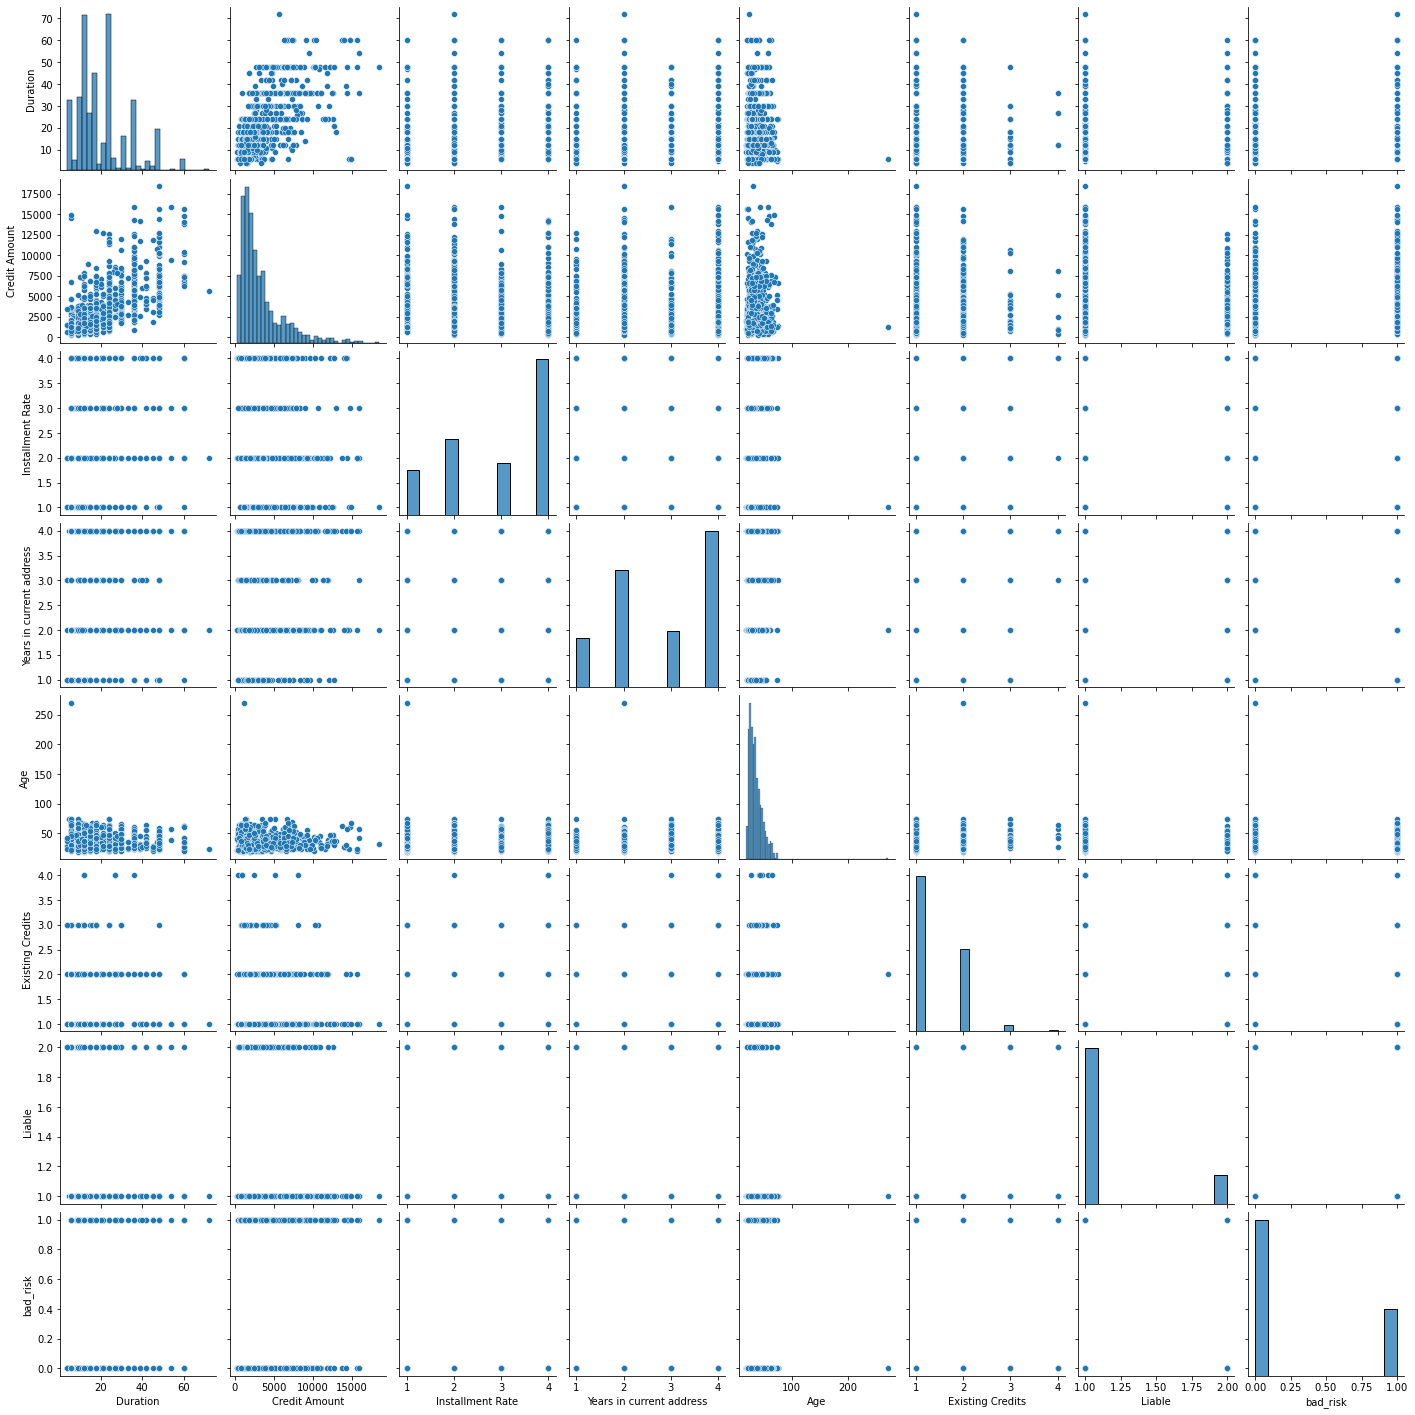

In [27]:
sns.pairplot(data=df)

### The Numerical Values all seem to be consisent and not pose any issues except for MAYBE the following: 'AGE', 'Duration', & 'Credit Amount'... Let us Inspect these variables more closely to distinguish the removal of any possible outliers that may lead to a less accurate model.

#### Duration Evaluated 

<AxesSubplot:xlabel='bad_risk', ylabel='Duration'>

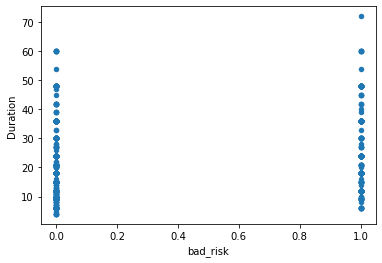

In [28]:
df.plot.scatter(x="bad_risk", y ="Duration")

<AxesSubplot:xlabel='bad_risk', ylabel='Age'>

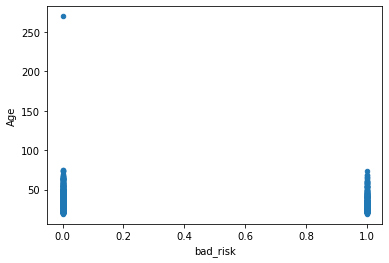

In [29]:
df.plot.scatter(x="bad_risk", y ="Age")

<AxesSubplot:xlabel='bad_risk', ylabel='Credit Amount'>

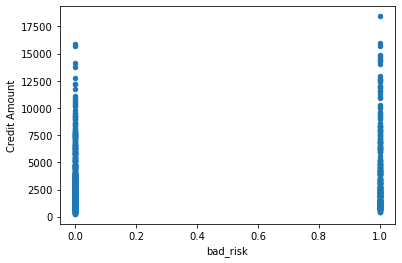

In [30]:
df.plot.scatter(x="bad_risk", y ="Credit Amount")

In [31]:
df['Duration'].describe()

count    1001.000000
mean       20.888112
std        12.061984
min         4.000000
25%        12.000000
50%        18.000000
75%        24.000000
max        72.000000
Name: Duration, dtype: float64

#### Lets BoxPlot and Take a Look at the Maximum Value that helps visualize that our numerical value contains no outliers in our dataset

<AxesSubplot:xlabel='Duration'>

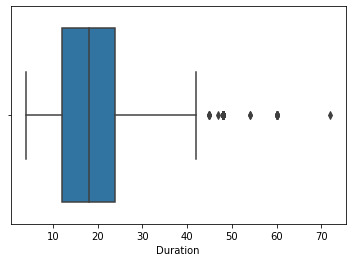

In [32]:
sns.boxplot(x=df['Duration'])

### The above histogram displays the 'MAXIMUM' of about a value of ~40. However it is important to inspect what this numerical representation is indicative of in our dataset. The Duration is a numerical field that indicates the amount of months an account has been open. These values while  technically considered 'outliers' should be included in our dataset as in a real world scenario(which our model is trying to be classify for) would have to take into account the duration. 

### Let Us Evaluate our 'Age' and 'Credit Amount' Numerical Variables 

count    1001.000000
mean       35.780220
std        13.571501
min        19.000000
25%        27.000000
50%        33.000000
75%        42.000000
max       270.000000
Name: Age, dtype: float64


<AxesSubplot:xlabel='Age'>

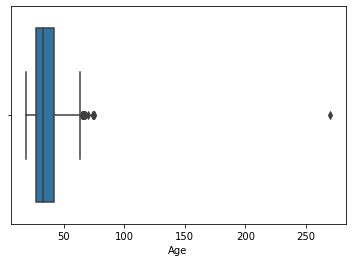

In [33]:
print(df['Age'].describe())
sns.boxplot(x=df['Age'])

#### Unlike the Duration numerical variable, this numerical variable that is represented by 'Age' in our dataset has an entry of 270. This can be cosidered a user input error, as this age is not an actual possibility and thus should be removed from our dataset. The other values while are considered outliers, are not outliers that need to be sanitized or removed. For the same fact that we applied to our 'Duration' variable. In the real world, which our model is being used to classify for, there are human beings above the threshold of ~80 (35.780220+42.00000(3STD AWAY) = 77.780220

count     1001.000000
mean      3269.209790
std       2822.069274
min        250.000000
25%       1364.000000
50%       2319.000000
75%       3972.000000
max      18424.000000
Name: Credit Amount, dtype: float64


<AxesSubplot:xlabel='Credit Amount'>

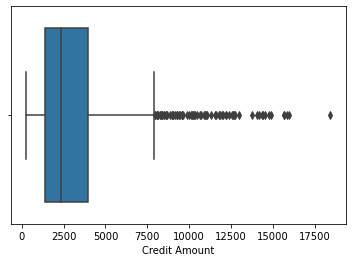

In [34]:
print(df['Credit Amount'].describe())
sns.boxplot(x=df['Credit Amount'])

#### Please see above logic when analyzing the dataset for outliers for the 'Credit Amount' variable. As stated in the real world their are various degrees of Credit Amount. As such the credit amount for one person may vary a large amount versus another, which is why while technically our boxplot displays outliers, the model is to be used to classify real world situations which the above values are all possible, and acceptable values.

### **AS PER INSTRUCTIONS** FOCUS SHOULD BE IN IDENTIFYING BAD RISK, THUS WE WANT OUR DATASET WITH A LARGER BREADTH OF VALUES TO BE REPRESENTATIVE OF CLASSIFYING A GOOD/BAD LOAN UNDER REAL WORLD ASSUMPTIONS

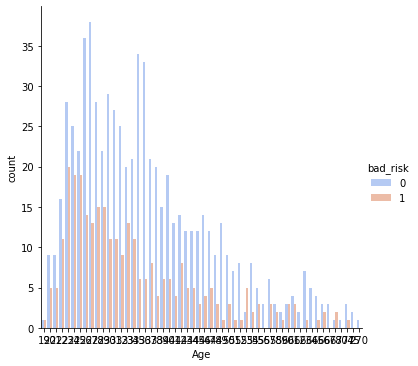

In [35]:
sns.factorplot('Age', kind='count', hue='bad_risk', data=df,palette='coolwarm')

### REMOVE the 'Age' Outlier

In [35]:
### display the Outlier
print(f'Number of Entries As of This Point:{df.shape[0]}')
df[df.Age > 120]

Number of Entries As of This Point:1001


,Checking Account,Duration,Credit History,Purpose,Credit Amount,Saving Account,Employment Status,Installment Rate,Personal Status,Guarantors,Years in current address,Property,Age,Installment plans,Housing,Existing Credits,Job,Liable,bad_risk
979,No Account,6,default,furniture/equipment,1221,unknown,1 to <4 years,1,male : married/widowed,none,2,life insurance,270,none,own,2,skilled employee,1,0


In [36]:
print(f'PRIOR REMOVAL OF AGE OUTLIER\n{df.Age.describe()}')

PRIOR REMOVAL OF AGE OUTLIER
count    1001.000000
mean       35.780220
std        13.571501
min        19.000000
25%        27.000000
50%        33.000000
75%        42.000000
max       270.000000
Name: Age, dtype: float64


In [37]:
df = df[df.Age < 120]

In [38]:
print(f'AFTER REMOVAL OF AGE OUTLIER\n{df.Age.describe()}')

AFTER REMOVAL OF AGE OUTLIER
count    1000.000000
mean       35.546000
std        11.375469
min        19.000000
25%        27.000000
50%        33.000000
75%        42.000000
max        75.000000
Name: Age, dtype: float64


### INVESTIGATING CATEGORICAL VARIABLES

In [39]:
df.describe()

,Duration,Credit Amount,Installment Rate,Years in current address,Age,Existing Credits,Liable,bad_risk
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,20.903000,3271.258000,2.973000,2.845000,35.546000,1.407000,1.155000,0.300000
std,12.058814,2822.736876,1.118715,1.103718,11.375469,0.577654,0.362086,0.458487
min,4.000000,250.000000,1.000000,1.000000,19.000000,1.000000,1.000000,0.000000
25%,12.000000,1365.500000,2.000000,2.000000,27.000000,1.000000,1.000000,0.000000
50%,18.000000,2319.500000,3.000000,3.000000,33.000000,1.000000,1.000000,0.000000
75%,24.000000,3972.250000,4.000000,4.000000,42.000000,2.000000,1.000000,1.000000
max,72.000000,18424.000000,4.000000,4.000000,75.000000,4.000000,2.000000,1.000000


In [40]:
df.head(5)

,Checking Account,Duration,Credit History,Purpose,Credit Amount,Saving Account,Employment Status,Installment Rate,Personal Status,Guarantors,Years in current address,Property,Age,Installment plans,Housing,Existing Credits,Job,Liable,bad_risk
0,little,6,default,radio/television,1169,unknown,>= 7 years,4,male : single,none,4,real estate,67,none,own,2,skilled employee,1,0
1,moderate,48,paid back,radio/television,5951,little,1 to <4 years,2,female : divorced/separated/married,none,2,real estate,22,none,own,1,skilled employee,1,1
2,No Account,12,default,education,2096,little,4 to <7 years,2,male : single,none,3,real estate,49,none,own,1,unskilled/resident,2,0
3,little,42,paid back,furniture/equipment,7882,little,4 to <7 years,2,male : single,guarantor,4,life insurance,45,none,for free,1,skilled employee,2,0
4,little,24,delay,car,4870,little,1 to <4 years,3,male : single,none,4,no property,53,none,for free,2,skilled employee,2,1


In [41]:
df['Checking Account'].unique()

array(['little', 'moderate', 'No Account', 'rich'], dtype=object)

In [42]:
df['Checking Account'].value_counts()

No Account    394
little        274
moderate      269
rich           63
Name: Checking Account, dtype: int64

In [43]:
df['Purpose'].unique()

array(['radio/television', 'education', 'furniture/equipment', 'car',
       'business', 'domestic appliances', 'repairs', 'others',
       'retraining'], dtype=object)

In [44]:
df['Purpose'].value_counts()

car                    337
radio/television       280
furniture/equipment    181
business                97
education               50
repairs                 22
others                  12
domestic appliances     12
retraining               9
Name: Purpose, dtype: int64

In [45]:
df['Saving Account'].unique()

array(['unknown', 'little', 'quite rich', 'rich', 'moderate'],
      dtype=object)

In [46]:
df['Saving Account'].value_counts()

little        603
unknown       183
moderate      103
quite rich     63
rich           48
Name: Saving Account, dtype: int64

In [47]:
df['Personal Status'].unique()

array(['male   : single', 'female : divorced/separated/married',
       'male   : divorced/separated', 'male   : married/widowed'],
      dtype=object)

In [48]:
df['Personal Status'].value_counts()

male   : single                        548
female : divorced/separated/married    310
male   : married/widowed                92
male   : divorced/separated             50
Name: Personal Status, dtype: int64

In [49]:
df['Guarantors'].unique()

array(['none', 'guarantor', 'co-applicant'], dtype=object)

In [50]:
df['Guarantors'].value_counts()

none            907
guarantor        52
co-applicant     41
Name: Guarantors, dtype: int64

In [51]:
df['Property'].unique()

array(['real estate', 'life insurance', 'no property', 'car'],
      dtype=object)

In [52]:
df['Property'].value_counts()

car               332
real estate       282
life insurance    232
no property       154
Name: Property, dtype: int64

In [53]:
df['Installment plans'].unique()

array(['none', 'bank', 'stores'], dtype=object)

In [54]:
df['Installment plans'].value_counts()

none      814
bank      139
stores     47
Name: Installment plans, dtype: int64

In [55]:
df['Housing'].unique()

array(['own', 'for free', 'rent'], dtype=object)

In [56]:
df['Housing'].value_counts()

own         713
rent        179
for free    108
Name: Housing, dtype: int64

In [57]:
df['Job'].unique()

array(['skilled employee', 'unskilled/resident',
       'management/highly qualified employee', 'unemployed/non-resident'],
      dtype=object)

In [58]:
df['Job'].value_counts()

skilled employee                        630
unskilled/resident                      200
management/highly qualified employee    148
unemployed/non-resident                  22
Name: Job, dtype: int64

In [59]:
df['bad_risk'].unique()

array([0, 1], dtype=int64)

In [60]:
df['bad_risk'].value_counts()

0    700
1    300
Name: bad_risk, dtype: int64

In [62]:
df.groupby(['bad_risk'])['Job','Housing','Installment plans','Property','Personal Status','Saving Account','Purpose','Checking Account'].describe()

Job                               Housing                   \
         count unique               top freq   count unique  top freq   
bad_risk                                                                
0          700      4  skilled employee  444     700      3  own  527   
1          300      4  skilled employee  186     300      3  own  186   

         Installment plans                   Property                   \
                     count unique   top freq    count unique  top freq   
bad_risk                                                                 
0                      700      3  none  590      700      4  car  230   
1                      300      3  none  224      300      4  car  102   

         Personal Status                              Saving Account         \
                   count unique              top freq          count unique   
bad_risk                                                                      
0                    700      4  male   : single  402            700      5   
1                    300      4  male   : single  146            300      5   

                      Purpose                  Checking Account         \
             top freq   count unique  top freq            count unique   
bad_risk                                                                 
0         little  386     700      9  car  231              700      4   
1         little  217     300      9  car  106              300      4   

                           
                 top freq  
bad_risk                   
0         No Account  348  
1             little  135

In [63]:
df.groupby(['bad_risk'])['Job'].describe()

,count,unique,top,freq
bad_risk,,,,
0,700,4,skilled employee,444
1,300,4,skilled employee,186


In [64]:
df.groupby(['bad_risk'])['Housing'].describe()

,count,unique,top,freq
bad_risk,,,,
0,700,3,own,527
1,300,3,own,186


In [65]:
df.groupby(['bad_risk'])['Installment plans'].describe()

,count,unique,top,freq
bad_risk,,,,
0,700,3,none,590
1,300,3,none,224


In [66]:
df.groupby(['bad_risk'])['Property'].describe()

,count,unique,top,freq
bad_risk,,,,
0,700,4,car,230
1,300,4,car,102


In [67]:
df.groupby(['bad_risk'])['Personal Status'].describe()

,count,unique,top,freq
bad_risk,,,,
0,700,4,male : single,402
1,300,4,male : single,146


In [68]:
df.groupby(['bad_risk'])['Purpose'].describe()

,count,unique,top,freq
bad_risk,,,,
0,700,9,car,231
1,300,9,car,106


In [69]:
df.groupby(['bad_risk'])['Checking Account'].describe()

,count,unique,top,freq
bad_risk,,,,
0,700,4,No Account,348
1,300,4,little,135


In [70]:
df['bad_risk'].describe()

count    1000.000000
mean        0.300000
std         0.458487
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         1.000000
Name: bad_risk, dtype: float64

In [71]:
df.head(15)

,Checking Account,Duration,Credit History,Purpose,Credit Amount,Saving Account,Employment Status,Installment Rate,Personal Status,Guarantors,Years in current address,Property,Age,Installment plans,Housing,Existing Credits,Job,Liable,bad_risk
0,little,6,default,radio/television,1169,unknown,>= 7 years,4,male : single,none,4,real estate,67,none,own,2,skilled employee,1,0
1,moderate,48,paid back,radio/television,5951,little,1 to <4 years,2,female : divorced/separated/married,none,2,real estate,22,none,own,1,skilled employee,1,1
2,No Account,12,default,education,2096,little,4 to <7 years,2,male : single,none,3,real estate,49,none,own,1,unskilled/resident,2,0
3,little,42,paid back,furniture/equipment,7882,little,4 to <7 years,2,male : single,guarantor,4,life insurance,45,none,for free,1,skilled employee,2,0
4,little,24,delay,car,4870,little,1 to <4 years,3,male : single,none,4,no property,53,none,for free,2,skilled employee,2,1
5,No Account,36,paid back,education,9055,unknown,1 to <4 years,2,male : single,none,4,no property,35,none,for free,1,unskilled/resident,2,0
6,No Account,24,paid back,furniture/equipment,2835,quite rich,>= 7 years,3,male : single,none,4,life insurance,53,none,own,1,skilled employee,1,0
7,moderate,36,paid back,car,6948,little,1 to <4 years,2,male : single,none,2,car,35,none,rent,1,management/highly qualified employee,1,0
8,No Account,12,paid back,radio/television,3059,rich,4 to <7 years,2,male : divorced/separated,none,4,real estate,61,none,own,1,unskilled/resident,1,0
9,moderate,30,default,car,5234,little,unemployed,4,male : married/widowed,none,2,car,28,none,own,2,management/highly qualified employee,1,1


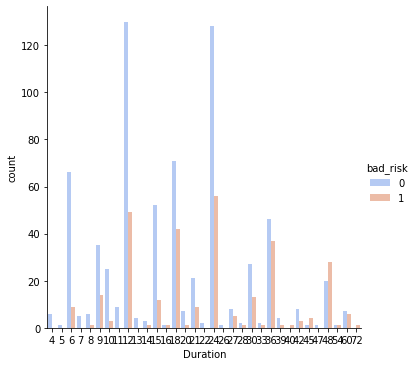

In [72]:
sns.factorplot('Duration', kind='count', hue='bad_risk', data=df,palette='coolwarm')

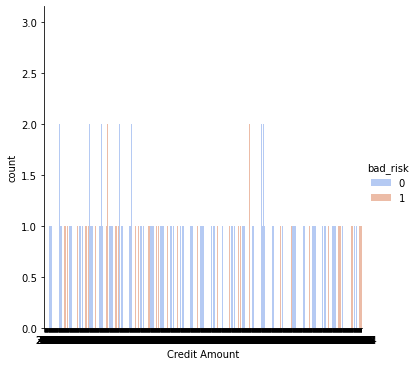

In [73]:
sns.factorplot('Credit Amount', kind='count', hue='bad_risk', data=df,palette='coolwarm')

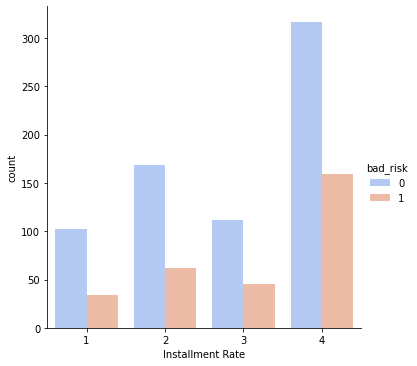

In [74]:
sns.factorplot('Installment Rate', kind='count', hue='bad_risk', data=df,palette='coolwarm')

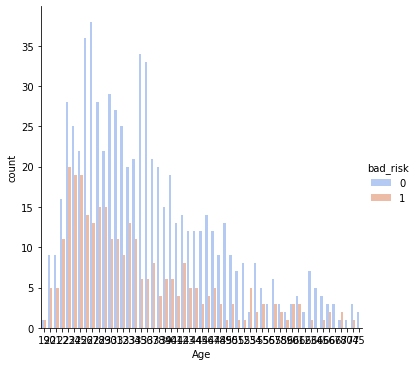

In [75]:
sns.factorplot('Age', kind='count', hue='bad_risk', data=df,palette='coolwarm')

In [72]:
df.corr()

,Duration,Credit Amount,Installment Rate,Years in current address,Age,Existing Credits,Liable,bad_risk
Duration,1.000000,0.624984,0.074749,0.034067,-0.036136,-0.011284,-0.023834,0.214927
Credit Amount,0.624984,1.000000,-0.271316,0.028926,0.032716,0.020795,0.017142,0.154739
Installment Rate,0.074749,-0.271316,1.000000,0.049302,0.058266,0.021669,-0.071207,0.072404
Years in current address,0.034067,0.028926,0.049302,1.000000,0.266419,0.089625,0.042643,0.002967
Age,-0.036136,0.032716,0.058266,0.266419,1.000000,0.149254,0.118201,-0.091127
Existing Credits,-0.011284,0.020795,0.021669,0.089625,0.149254,1.000000,0.109667,-0.045732
Liable,-0.023834,0.017142,-0.071207,0.042643,0.118201,0.109667,1.000000,-0.003015
bad_risk,0.214927,0.154739,0.072404,0.002967,-0.091127,-0.045732,-0.003015,1.000000


In [73]:
###Strongest Correlations are always 1.0 and -1.0 thus 
duration_diff = 1.0-.214927
credit_amount_diff = 1.0 - .154739
installment_rate_diff = 1.0 - .072404
years_diff = 1.0 - .002967
age_diff = (0.091127) - 1.0
exsisting_credits_diff = (.045732) - 1.0
liable_diff = (.003015) - 1.0

In [74]:
print(duration_diff,credit_amount_diff,installment_rate_diff,years_diff,age_diff, exsisting_credits_diff, liable_diff)

0.785073 0.845261 0.927596 0.997033 -0.908873 -0.954268 -0.996985


In [75]:
df.groupby('bad_risk').mean()

,Duration,Credit Amount,Installment Rate,Years in current address,Age,Existing Credits,Liable
bad_risk,,,,,,,
0,19.207143,2985.457143,2.920000,2.842857,36.224286,1.424286,1.155714
1,24.860000,3938.126667,3.096667,2.850000,33.963333,1.366667,1.153333


In [76]:
RATIO_AGE = 36.224286/33.963333 * 100.00
RATIO_AGE
RATIO_DURATION = 19.207143/24.860000 * 100.00
RATIO_DURATION
RATIO_CREDIT = 2985.457143/3938.126667 * 100.00
print(RATIO_AGE,RATIO_DURATION,RATIO_CREDIT)

106.65704099182491 77.26123491552694 75.80906851008609


#### Being that we are primarily interested in only the bad_risk we are going to use the AGE Numerical Value in our Linear Regression Model 

In [77]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score
df2 = df[['Age','Duration','Credit Amount', 'Installment Rate', 'bad_risk']]
df2.head()

,Age,Duration,Credit Amount,Installment Rate,bad_risk
0,67,6,1169,4,0
1,22,48,5951,2,1
2,49,12,2096,2,0
3,45,42,7882,2,0
4,53,24,4870,3,1


In [78]:
numerical_df = df[['Age','Duration','Credit Amount', 'Installment Rate', 'bad_risk']]

In [79]:
# 20% testing size 
# 80% of the DataSet Unused
X_train, X_test, y_train, y_test = train_test_split(df2.drop('bad_risk',axis=1), 
                                                    df2['bad_risk'], test_size=0.20, 
                                                    random_state=0)
model = LogisticRegression()
model.fit(X_train,y_train)
predictions = model.predict(X_test)
print(classification_report(y_test,predictions))
print(accuracy_score(y_test, predictions))

              precision    recall  f1-score   support

           0       0.74      0.94      0.83       142
           1       0.55      0.19      0.28        58

    accuracy                           0.72       200
   macro avg       0.64      0.56      0.55       200
weighted avg       0.68      0.72      0.67       200

0.72


In [80]:
df3 = df[['Age','bad_risk']]
df3.head()

,Age,bad_risk
0,67,0
1,22,1
2,49,0
3,45,0
4,53,1


In [81]:
# 20% testing size 
# 80% of the DataSet Unused
X_train, X_test, y_train, y_test = train_test_split(df3.drop('bad_risk',axis=1), 
                                                    df3['bad_risk'], test_size=0.20, 
                                                    random_state=0)
model_2 = LogisticRegression()
model_2.fit(X_train,y_train)
predictions = model_2.predict(X_test)
print(classification_report(y_test,predictions))
print(accuracy_score(y_test, predictions))

              precision    recall  f1-score   support

           0       0.71      1.00      0.83       142
           1       0.00      0.00      0.00        58

    accuracy                           0.71       200
   macro avg       0.35      0.50      0.42       200
weighted avg       0.50      0.71      0.59       200

0.71


In [82]:
df4 = df[['Duration','bad_risk']]
df4.head()

,Duration,bad_risk
0,6,0
1,48,1
2,12,0
3,42,0
4,24,1


In [83]:
# 20% testing size 
# 80% of the DataSet Unused
X_train, X_test, y_train, y_test = train_test_split(df4.drop('bad_risk',axis=1), 
                                                    df4['bad_risk'], test_size=0.20, 
                                                    random_state=0)
model_3 = LogisticRegression()
model_3.fit(X_train,y_train)
predictions = model_3.predict(X_test)
print(classification_report(y_test,predictions))
print(accuracy_score(y_test, predictions))

              precision    recall  f1-score   support

           0       0.72      0.93      0.81       142
           1       0.41      0.12      0.19        58

    accuracy                           0.69       200
   macro avg       0.57      0.53      0.50       200
weighted avg       0.63      0.69      0.63       200

0.695


In [84]:
df5 = df[['Installment Rate','bad_risk']]
df5.head()

,Installment Rate,bad_risk
0,4,0
1,2,1
2,2,0
3,2,0
4,3,1


In [85]:
# 20% testing size 
# 80% of the DataSet Unused
X_train, X_test, y_train, y_test = train_test_split(df5.drop('bad_risk',axis=1), 
                                                    df5['bad_risk'], test_size=0.20, 
                                                    random_state=0)
model_4 = LogisticRegression()
model_4.fit(X_train,y_train)
predictions = model_4.predict(X_test)
print(classification_report(y_test,predictions))
print(accuracy_score(y_test, predictions))

              precision    recall  f1-score   support

           0       0.71      1.00      0.83       142
           1       0.00      0.00      0.00        58

    accuracy                           0.71       200
   macro avg       0.35      0.50      0.42       200
weighted avg       0.50      0.71      0.59       200

0.71


### CATEGORICAL VARIABLES

In [86]:
# Inspect and select the Categorical Variables
df.head(1)

,Checking Account,Duration,Credit History,Purpose,Credit Amount,Saving Account,Employment Status,Installment Rate,Personal Status,Guarantors,Years in current address,Property,Age,Installment plans,Housing,Existing Credits,Job,Liable,bad_risk
0,little,6,default,radio/television,1169,unknown,>= 7 years,4,male : single,none,4,real estate,67,none,own,2,skilled employee,1,0


<AxesSubplot:xlabel='Checking Account', ylabel='count'>

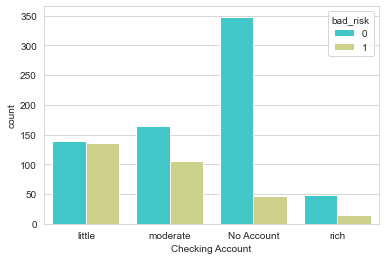

In [91]:
sns.set_style('whitegrid')
sns.countplot(x='Checking Account',hue='bad_risk',data=df,palette='rainbow')

In [87]:
checking_account = pd.get_dummies(df['Checking Account'],drop_first=True)

<AxesSubplot:xlabel='Credit History', ylabel='count'>

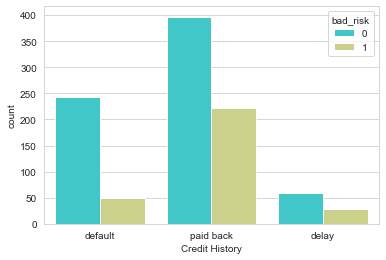

In [93]:
sns.set_style('whitegrid')
sns.countplot(x='Credit History',hue='bad_risk',data=df,palette='rainbow')

In [88]:
credit_history = pd.get_dummies(df['Credit History'],drop_first=True)

<AxesSubplot:xlabel='Purpose', ylabel='count'>

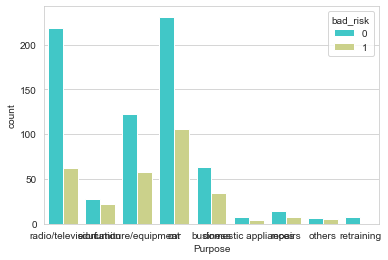

In [95]:
sns.set_style('whitegrid')
sns.countplot(x='Purpose',hue='bad_risk',data=df,palette='rainbow')

In [89]:
purpose = pd.get_dummies(df['Purpose'],drop_first=True)

<AxesSubplot:xlabel='Saving Account', ylabel='count'>

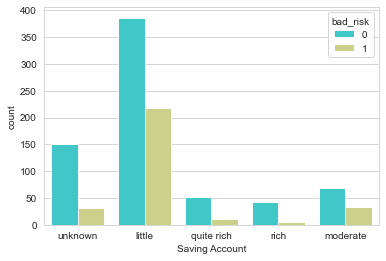

In [97]:
sns.set_style('whitegrid')
sns.countplot(x='Saving Account',hue='bad_risk',data=df,palette='rainbow')

In [90]:
saving_account = pd.get_dummies(df['Saving Account'],drop_first=True)

<AxesSubplot:xlabel='Employment Status', ylabel='count'>

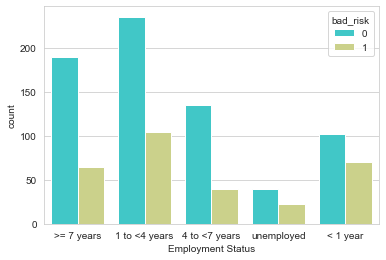

In [99]:
sns.set_style('whitegrid')
sns.countplot(x='Employment Status',hue='bad_risk',data=df,palette='rainbow')

In [91]:
employment_status = pd.get_dummies(df['Employment Status'],drop_first=True)

<AxesSubplot:xlabel='Personal Status', ylabel='count'>

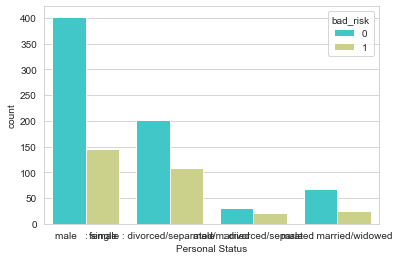

In [101]:
sns.set_style('whitegrid')
sns.countplot(x='Personal Status',hue='bad_risk',data=df,palette='rainbow')

In [92]:
personal_status = pd.get_dummies(df['Personal Status'],drop_first=True)

<AxesSubplot:xlabel='Guarantors', ylabel='count'>

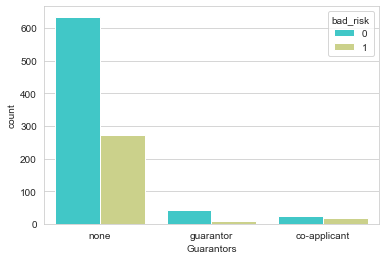

In [103]:
sns.set_style('whitegrid')
sns.countplot(hue='bad_risk',x='Guarantors',data=df,palette='rainbow')

In [93]:
guarantors = pd.get_dummies(df['Guarantors'],drop_first=True)

<AxesSubplot:xlabel='Property', ylabel='count'>

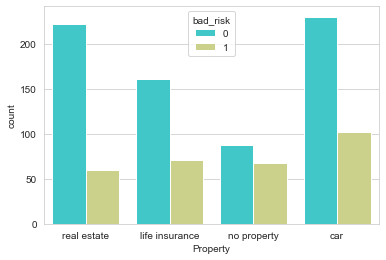

In [105]:
sns.set_style('whitegrid')
sns.countplot(x='Property',hue='bad_risk',data=df,palette='rainbow')

In [94]:
prop = pd.get_dummies(df['Property'],drop_first=True)

<AxesSubplot:xlabel='Installment plans', ylabel='count'>

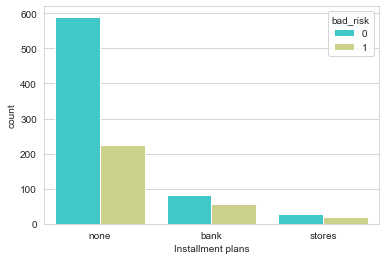

In [107]:
sns.set_style('whitegrid')
sns.countplot(x='Installment plans',hue='bad_risk',data=df,palette='rainbow')

In [95]:
installment_plans = pd.get_dummies(df['Installment plans'],drop_first=True)

<AxesSubplot:xlabel='Housing', ylabel='count'>

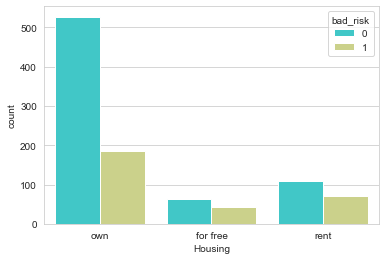

In [109]:
sns.set_style('whitegrid')
sns.countplot(x='Housing',hue='bad_risk',data=df,palette='rainbow')

In [96]:
housing = pd.get_dummies(df['Housing'],drop_first=True)

<AxesSubplot:xlabel='Job', ylabel='count'>

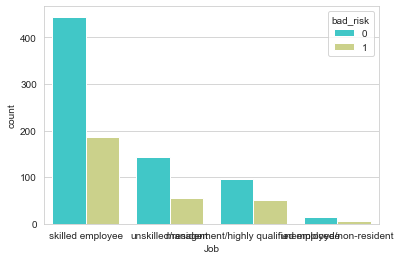

In [111]:
sns.set_style('whitegrid')
sns.countplot(x='Job',hue='bad_risk',data=df,palette='rainbow')

In [97]:
job = pd.get_dummies(df['Job'],drop_first=True)

In [98]:
job.head()

,skilled employee,unemployed/non-resident,unskilled/resident
0,1,0,0
1,1,0,0
2,0,0,1
3,1,0,0
4,1,0,0


In [99]:
housing.head()

,own,rent
0,1,0
1,1,0
2,1,0
3,0,0
4,0,0


In [100]:
installment_plans.head()

,none,stores
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0


In [101]:
installment_plans.columns = ['installment_none','installment_stores']
installment_plans.head()

,installment_none,installment_stores
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0


In [103]:
prop.head()

,life insurance,no property,real estate
0,0,0,1
1,0,0,1
2,0,0,1
3,1,0,0
4,0,1,0


In [104]:
guarantors.head()

,guarantor,none
0,0,1
1,0,1
2,0,1
3,1,0
4,0,1


In [105]:
guarantors.columns = ['guarantor','guarantor_none']
guarantors.head()

,guarantor,guarantor_none
0,0,1
1,0,1
2,0,1
3,1,0
4,0,1


In [106]:
personal_status.head()

,male : divorced/separated,male : married/widowed,male : single
0,0,0,1
1,0,0,0
2,0,0,1
3,0,0,1
4,0,0,1


In [107]:
employment_status.head()

,4 to <7 years,< 1 year,>= 7 years,unemployed
0,0,0,1,0
1,0,0,0,0
2,1,0,0,0
3,1,0,0,0
4,0,0,0,0


In [108]:
saving_account.head()

,moderate,quite rich,rich,unknown
0,0,0,0,1
1,0,0,0,0
2,0,0,0,0
3,0,0,0,0
4,0,0,0,0


In [109]:
saving_account.columns = ['saving_moderate','saving_quite_rich','saving_rich','saving_unknown']
saving_account.head()

,saving_moderate,saving_quite_rich,saving_rich,saving_unknown
0,0,0,0,1
1,0,0,0,0
2,0,0,0,0
3,0,0,0,0
4,0,0,0,0


In [111]:
purpose.head()

,car,domestic appliances,education,furniture/equipment,others,radio/television,repairs,retraining
0,0,0,0,0,0,1,0,0
1,0,0,0,0,0,1,0,0
2,0,0,1,0,0,0,0,0
3,0,0,0,1,0,0,0,0
4,1,0,0,0,0,0,0,0


In [112]:
checking_account.head()

,little,moderate,rich
0,1,0,0
1,0,1,0
2,0,0,0
3,1,0,0
4,1,0,0


In [113]:
checking_account.columns = ['checking_little','checking_moderate','checking_rich']
checking_account.head()

,checking_little,checking_moderate,checking_rich
0,1,0,0
1,0,1,0
2,0,0,0
3,1,0,0
4,1,0,0


In [114]:
credit_history.head()

,delay,paid back
0,0,0
1,0,1
2,0,0
3,0,1
4,1,0


In [115]:
df.shape[0]

1000

In [116]:
df = pd.concat([numerical_df,credit_history,checking_account,purpose,saving_account,employment_status,personal_status,guarantors,prop,installment_plans,housing,job], axis=1)
df.head()

,Age,Duration,Credit Amount,Installment Rate,bad_risk,delay,paid back,checking_little,checking_moderate,checking_rich,car,domestic appliances,education,furniture/equipment,others,radio/television,repairs,retraining,saving_moderate,saving_quite_rich,saving_rich,saving_unknown,4 to <7 years,< 1 year,>= 7 years,unemployed,male : divorced/separated,male : married/widowed,male : single,guarantor,guarantor_none,life insurance,no property,real estate,installment_none,installment_stores,own,rent,skilled employee,unemployed/non-resident,unskilled/resident
0,67,6,1169,4,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,1,0,1,0,0,1,1,0,1,0,1,0,0
1,22,48,5951,2,1,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,1,0,1,0,0
2,49,12,2096,2,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,1,1,0,1,0,0,0,1
3,45,42,7882,2,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,1,0,0,1,0,0,0,1,0,0
4,53,24,4870,3,1,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,1,0,0,0,1,0,0


In [117]:
X_train, X_test, y_train, y_test = train_test_split(df.drop('bad_risk',axis=1), 
                                                    df['bad_risk'], test_size=0.20, 
                                                    random_state=0)
model = LogisticRegression()
model.fit(X_train,y_train)
predictions = model.predict(X_test)
print(classification_report(y_test,predictions))
print(accuracy_score(y_test, predictions))

              precision    recall  f1-score   support

           0       0.78      0.87      0.82       142
           1       0.55      0.38      0.45        58

    accuracy                           0.73       200
   macro avg       0.66      0.63      0.64       200
weighted avg       0.71      0.73      0.71       200

0.73


<AxesSubplot:xlabel='trial'>

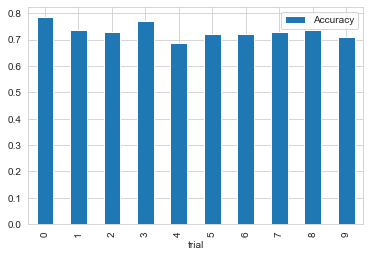

In [131]:
accuracy = []
for i in range(10):
    X_train, X_test, Y_train, Y_test = train_test_split(df.drop('bad_risk',axis=1),df['bad_risk'], test_size=0.2)
    model = LogisticRegression()
    model.fit(X_train, Y_train)
    y_predictions = model.predict(X_test)
    accuracy.append(accuracy_score(Y_test,y_predictions))
    
rdf_new = pd.DataFrame( {'trial': range(10), 'Accuracy': accuracy})
rdf_new.plot.bar(x='trial', y='Accuracy')

In [132]:
### LETS DO THE SAME PROCESS NOW WITHOUT THE CREDIT HISTORY VARIABLE

In [118]:
df_without = pd.concat([numerical_df,checking_account,purpose,saving_account,employment_status,personal_status,guarantors,prop,installment_plans,housing,job], axis=1)
df_without.head()

,Age,Duration,Credit Amount,Installment Rate,bad_risk,checking_little,checking_moderate,checking_rich,car,domestic appliances,education,furniture/equipment,others,radio/television,repairs,retraining,saving_moderate,saving_quite_rich,saving_rich,saving_unknown,4 to <7 years,< 1 year,>= 7 years,unemployed,male : divorced/separated,male : married/widowed,male : single,guarantor,guarantor_none,life insurance,no property,real estate,installment_none,installment_stores,own,rent,skilled employee,unemployed/non-resident,unskilled/resident
0,67,6,1169,4,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,1,0,1,0,0,1,1,0,1,0,1,0,0
1,22,48,5951,2,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,1,0,1,0,0
2,49,12,2096,2,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,1,1,0,1,0,0,0,1
3,45,42,7882,2,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,1,0,0,1,0,0,0,1,0,0
4,53,24,4870,3,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,1,0,0,0,1,0,0


In [119]:
X_train, X_test, y_train, y_test = train_test_split(df_without.drop('bad_risk',axis=1), 
                                                    df_without['bad_risk'], test_size=0.20, 
                                                    random_state=0)
model = LogisticRegression()
model.fit(X_train,y_train)
predictions = model.predict(X_test)
print(classification_report(y_test,predictions))
print(accuracy_score(y_test, predictions))

              precision    recall  f1-score   support

           0       0.79      0.87      0.83       142
           1       0.57      0.43      0.49        58

    accuracy                           0.74       200
   macro avg       0.68      0.65      0.66       200
weighted avg       0.72      0.74      0.73       200

0.74


<AxesSubplot:xlabel='trial'>

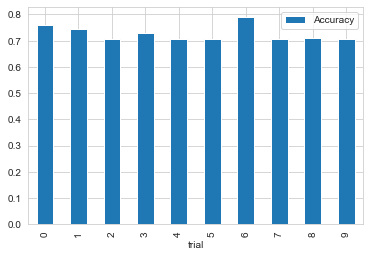

In [135]:
accuracy = []
for i in range(10):
    X_train, X_test, Y_train, Y_test = train_test_split(df_without.drop('bad_risk',axis=1),df_without['bad_risk'], test_size=0.2)
    model = LogisticRegression()
    model.fit(X_train, Y_train)
    y_predictions = model.predict(X_test)
    accuracy.append(accuracy_score(Y_test,y_predictions))
    
rdf_new = pd.DataFrame( {'trial': range(10), 'Accuracy': accuracy})
rdf_new.plot.bar(x='trial', y='Accuracy')

### We have concluded our Logisitic Regression model above that does seem to pass 10-Fold Cross Validation. Using the numerical fields, and the above categorical fields transformed into numerical ready data; we were able to get an accuracy score that was above 70% which is acceptable for our model. 

### Let us do the same process now using a SVM model

In [128]:
df.head()

,Age,Duration,Credit Amount,Installment Rate,bad_risk,delay,paid back,checking_little,checking_moderate,checking_rich,car,domestic appliances,education,furniture/equipment,others,radio/television,repairs,retraining,saving_moderate,saving_quite_rich,saving_rich,saving_unknown,4 to <7 years,< 1 year,>= 7 years,unemployed,male : divorced/separated,male : married/widowed,male : single,guarantor,guarantor_none,life insurance,no property,real estate,installment_none,installment_stores,own,rent,skilled employee,unemployed/non-resident,unskilled/resident
0,67,6,1169,4,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,1,0,1,0,0,1,1,0,1,0,1,0,0
1,22,48,5951,2,1,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,1,0,1,0,0
2,49,12,2096,2,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,1,1,0,1,0,0,0,1
3,45,42,7882,2,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,1,0,0,1,0,0,0,1,0,0
4,53,24,4870,3,1,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,1,0,0,0,1,0,0


In [129]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import train_test_split

In [131]:
#X are features used to determine 'bad_risk'
X = df.drop('bad_risk', axis=1).values
#Y is what we're trying to predict
Y = df['bad_risk'].values

#Split the data
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=0)

#model
svc_model = SVC(kernel='linear')
svc_model.fit(X_train, Y_train)

#evaluation
Y_pred = svc_model.predict(X_test)
print("Kernel = Linear, C = 1")
print("Accuracy: ", accuracy_score(Y_test, Y_pred))
print(classification_report(Y_test, Y_pred))

Kernel = Linear, C = 1
Accuracy:  0.74
              precision    recall  f1-score   support

           0       0.81      0.83      0.82       142
           1       0.56      0.52      0.54        58

    accuracy                           0.74       200
   macro avg       0.68      0.67      0.68       200
weighted avg       0.73      0.74      0.74       200



In [ ]:
accuracy_with_k = []
for i in range(10):
    svc_model_k = SVC(kernel='linear')
    svc_model_k.fit(X_train, Y_train)
    Y_pred_SVC = svc_model_k.predict(X_test)
    accuracy_with_k.append(accuracy_score(Y_test,Y_pred_SVC))

svc_model_with = pd.DataFrame( {'trial': range(10), 'Accuracy': accuracy_with_k})
svc_model_with.plot.bar(x='trial', y='Accuracy')

In [126]:
df_without.head()

,Age,Duration,Credit Amount,Installment Rate,bad_risk,checking_little,checking_moderate,checking_rich,car,domestic appliances,education,furniture/equipment,others,radio/television,repairs,retraining,saving_moderate,saving_quite_rich,saving_rich,saving_unknown,4 to <7 years,< 1 year,>= 7 years,unemployed,male : divorced/separated,male : married/widowed,male : single,guarantor,guarantor_none,life insurance,no property,real estate,installment_none,installment_stores,own,rent,skilled employee,unemployed/non-resident,unskilled/resident
0,67,6,1169,4,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,1,0,1,0,0,1,1,0,1,0,1,0,0
1,22,48,5951,2,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,1,0,1,0,0
2,49,12,2096,2,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,1,1,0,1,0,0,0,1
3,45,42,7882,2,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,1,0,0,1,0,0,0,1,0,0
4,53,24,4870,3,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,1,0,0,0,1,0,0


In [ ]:
#X are features used to determine 'bad_risk'
X_SVM_WITHOUT = df_without.drop('bad_risk', axis=1).values
#Y is what we're trying to predict
Y_SVM_WITHOUT = df_without['bad_risk'].values

#Split the data
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=0)

#model
svc_model_without = SVC(kernel='linear')
svc_model_without.fit(X_train, Y_train)

#evaluation
Y_pred_svc_without = svc_model_without.predict(X_test)
print("Kernel = Linear, C = 100")
print("Accuracy: ", accuracy_score(Y_test, Y_pred_svc_without))
print(classification_report(Y_test, Y_pred_svc_without))

In [ ]:
accuracy_SVM_K_without = []
for i in range(10):
    X_train, X_test, Y_train, Y_test = train_test_split(X_SVM_WITHOUT,Y_SVM_WITHOUT, test_size=0.2)
    svc_model_without = SVC(kernel='linear')
    svc_model_without.fit(X_train, Y_train)
    y_predictions_svc_without = svc_model_without.predict(X_test)
    accuracy_SVM_K_without.append(accuracy_score(Y_test,y_predictions_svc_without))
    
svc_model_without_k = pd.DataFrame( {'trial': range(10), 'Accuracy': accuracy_SVM_K_without})
svc_model_without_k.plot.bar(x='trial', y='Accuracy')

### Final Assesment 

### Logistic Regression versus SVM using Credit History and without it. What worked best?
   * The recall and accuracy both increased after adding the categorical data(transformed*) into the dataset. Our logistic regression model utilizing both 'Credit History' and not using 'Credit History' both passed 10-K Fold Validation. Our recall value which is indicative for bad_credit increases as we remove 'Credit History' from our model, but our accuracy more or less stays the same with a 74% accuracy reading versus 73%. 
   * Accuracy = Number of correct predictions / Total number of predictions
   * The SVM model we utilized with our Dataset that included 'Credit History' outputted an accuracy of 74% with a recall of 40% which is more or less in line with the values we received using our logistic regression model. That being said, the recall here is slightly more than our previous model, and if we are interested in ensuring we classify and not miss any bad_credit candidates we should use this SVM model versus our logistic regression model if we are to include 'Credit History' in our model. 
   * If WE ARE NOT including 'Credit History' in our SVM model, our output was slightly better in a similiar way to the logistic regression model we built. Comaring the two models, either or seem fairly accurate, albeit both recall rates are not ideal as they fall far below the 70% threshold. If we were to use one of the models, I believe that the SVM model that does not include credit history, would be the best model to use. It seems that the difference in a good classification model that predicts a bad candidate would most likely be best using the SVM model without the credit history. It can also be shown above that the SVM with 'Credit History' and without it pass 10-K-Fold Validation. I initially ran the SVM machine before this and it passed 10-K-FOLD-VALIDATION unfortunately, I ran it again shortly prior to the submittal time and its now taking quite some time to produce the output that was there beforehand. 